In [1]:
# import the necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from plotnine import *

1. (4 pts) Using the Palmer Penguin data (`"https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv"`), make a plot that looks at whether the correlation between **body mass and flipper length** is the same between male and female penguins. Start with a default graph and change one thing (or one "class" of things, like getting rid of all gridlines) at a time showing EACH GRAPH AT EACH STEP, similar to how I did in the Class 6 lecture video. Again, make sure you're thinking about these concepts:
    * what visual elements can I get rid of because they distract from my message?
    * what visual elements can I add to support my message?
    * how can I make this visualizations more accessible?
2. (3 pts) In words (after each step from 1, add a Markdown cell and write justification), explain your thought process for each step.
3. (3 pts) Recreate the graph cereal.png (in the Assignmnets folder on GH) using the cereal data set (`"https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/cereal.csv"`).


In [2]:
### YOUR CODE HERE ###
#1 make a plot that looks at whether the correlation between body mass and flipper length 
#  is the same between male and female penguins. Start with a default graph and change one thing 
#  (or one "class" of things, like getting rid of all gridlines) 
#  at a time, similar to how I did in the Class 6 lecture video.

pg = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv")

<b>First, let's start with a simple dot plot with x = body mass and y = flipper length<b/>

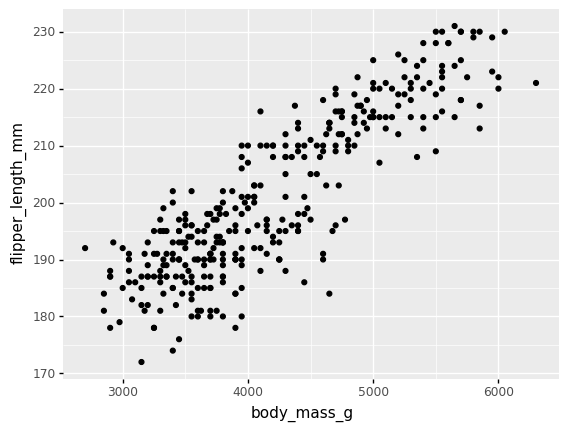

<ggplot: (139136953013)>

In [3]:
(ggplot( pg, aes(x = "body_mass_g", y = "flipper_length_mm")) + geom_point())

<b>Next, we need to differentiate between male and female penguins<b/>

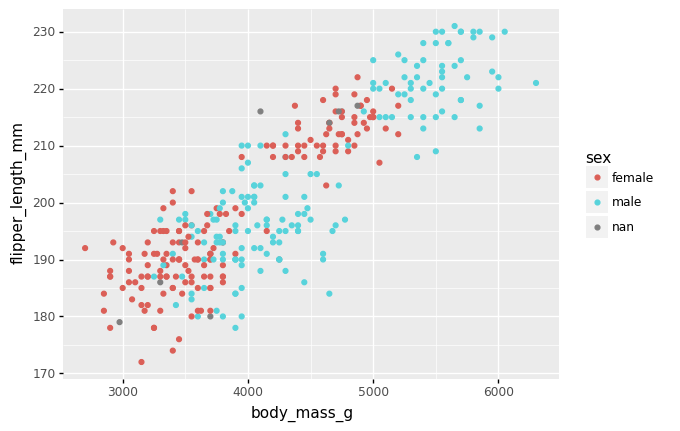

<ggplot: (139139316038)>

In [4]:
(ggplot( pg, aes(x = "body_mass_g", y = "flipper_length_mm", color = "sex")) + geom_point())

<b>There are some penguins lacking data, so let's prune the dataframe to make sure all the data is spick and span.<b/><br>
<b>Let's also throw in some shapes for the data points and make them bigger for good measure.<b/>
   

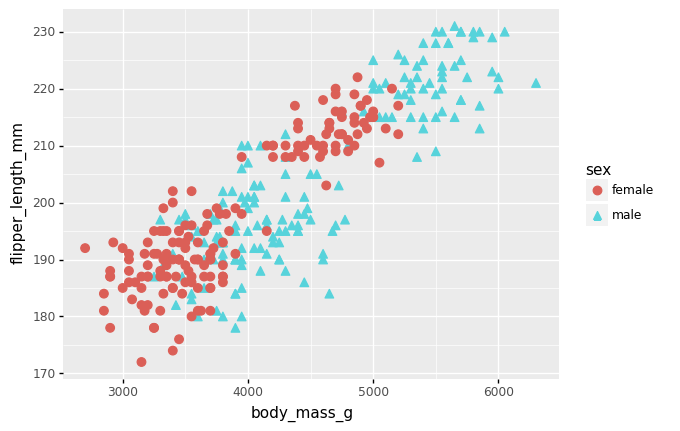

<ggplot: (139117911655)>

In [5]:
isCleanData = (pg['sex'] == "male" ) | (pg['sex'] == "female")

pg = pg.loc[isCleanData]

(ggplot( pg, aes(x = "body_mass_g", y = "flipper_length_mm", color = "sex")) + geom_point(aes(shape = "sex"), size = 3))

<b>Ahhhhhh much better! Now let's clean up the theme and those gridlines. Since we are only looking at correlation, we don't need them at all!<b/>

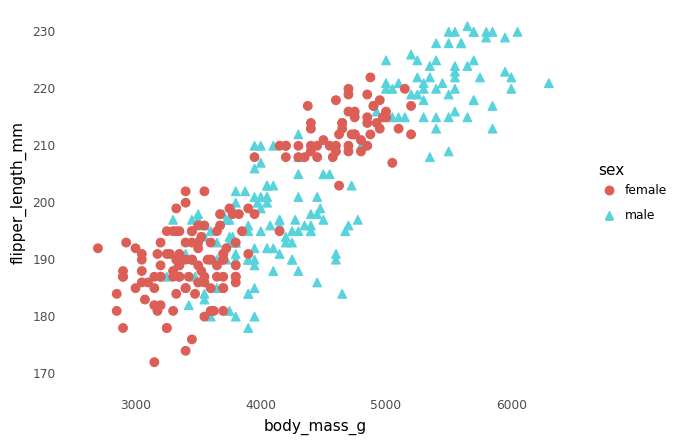

<ggplot: (139136953016)>

In [6]:
(ggplot( pg, aes(x = "body_mass_g", y = "flipper_length_mm", color = "sex")) + 
 geom_point(aes(shape = "sex"), size = 3) +
 theme_minimal() +
 theme(panel_grid_major = element_blank(),
       panel_grid_minor = element_blank()
 ))

<b>Now it's time to fix the labels. We don't need any exact data points and we do need more simple axis titles<b/>

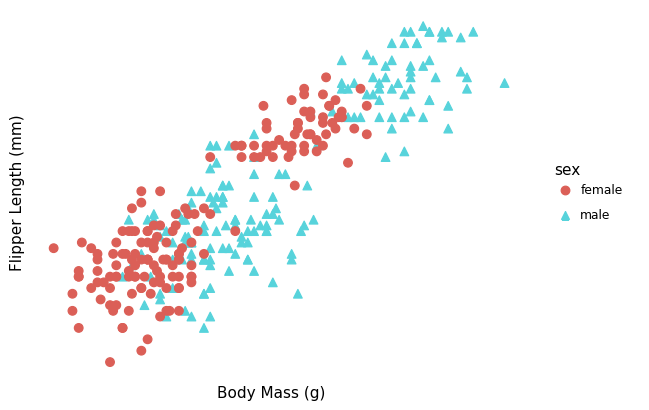

<ggplot: (139139484609)>

In [7]:
(ggplot( pg, aes(x = "body_mass_g", y = "flipper_length_mm", color = "sex")) + 
 geom_point(aes(shape = "sex"), size = 3) +
 theme_minimal() +
 labs(x = "Body Mass (g)", y = "Flipper Length (mm)") +
 theme(panel_grid_major = element_blank(),
       panel_grid_minor = element_blank(),
       axis_text = element_blank()
 ))

<b>We also need a title for the whole graph!</b>

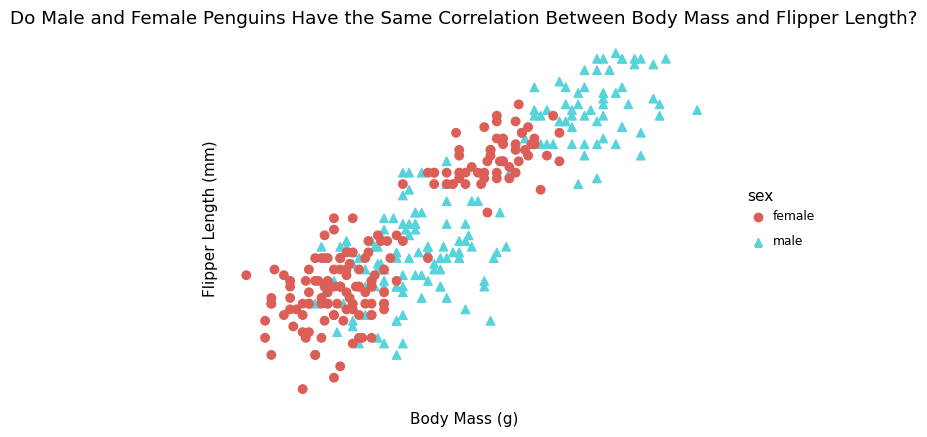

<ggplot: (139139576137)>

In [8]:
(ggplot( pg, aes(x = "body_mass_g", y = "flipper_length_mm", color = "sex")) + 
 geom_point(aes(shape = "sex"), size = 3) +
 theme_minimal() +
 ggtitle("Do Male and Female Penguins Have the Same Correlation Between Body Mass and Flipper Length?") +
 labs(x = "Body Mass (g)", y = "Flipper Length (mm)") +
 theme(panel_grid_major = element_blank(),
       panel_grid_minor = element_blank(),
       axis_text = element_blank()
 ))

<b>Now let's make things a bit bigger</b>

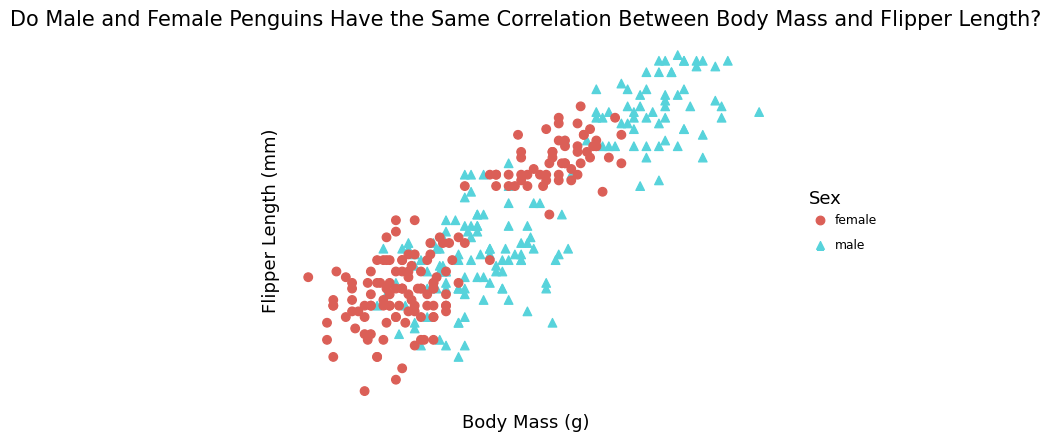

<ggplot: (139139605709)>

In [9]:
(ggplot( pg, aes(x = "body_mass_g", y = "flipper_length_mm", color = "sex")) + 
 geom_point(aes(shape = "sex"), size = 3) +
 theme_minimal() +
 ggtitle("Do Male and Female Penguins Have the Same Correlation Between Body Mass and Flipper Length?") +
 labs(x = "Body Mass (g)", y = "Flipper Length (mm)") +
 theme(panel_grid_major = element_blank(),
       panel_grid_minor = element_blank(),
       axis_text = element_blank(),
       axis_title = element_text(size = 13),
       plot_title = element_text(size = 15),
       legend_title = element_text(size = 13, text = "Sex")
 ))

<b>Do we *really* need all those points? NO!<br>
Since we're only looking at the correlation, we just need some trend lines.</b>

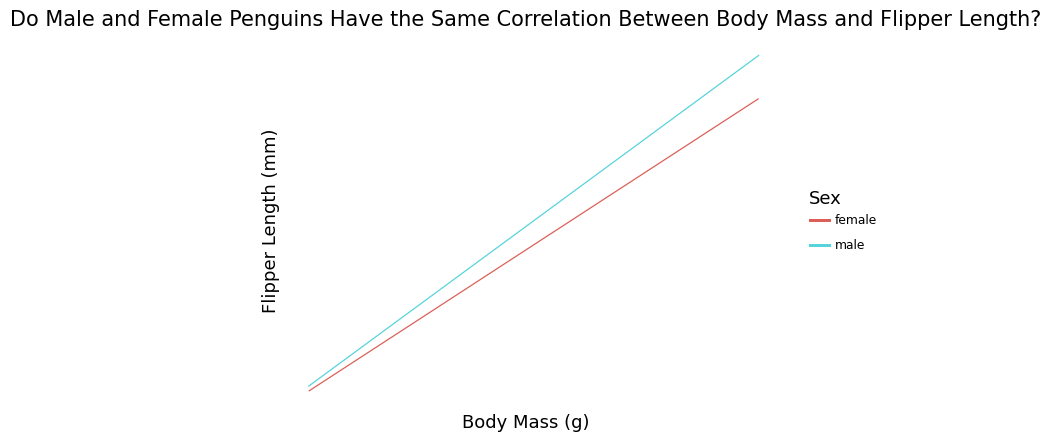

<ggplot: (139139574077)>

In [10]:
isMale = (pg['sex'] == "male")
(ggplot( pg.loc[isMale], aes(x = "body_mass_g", y = "flipper_length_mm", color = "sex")) + 
 #geom_point(aes(shape = "sex"), size = 3) +
 geom_qq_line(pg, aes(sample = "flipper_length_mm", group = "sex", x = "body_mass_g")) + 
 theme_minimal() +
 ggtitle("Do Male and Female Penguins Have the Same Correlation Between Body Mass and Flipper Length?") +
 labs(x = "Body Mass (g)", y = "Flipper Length (mm)") +
 theme(panel_grid_major = element_blank(),
       panel_grid_minor = element_blank(),
       axis_text = element_blank(),
       axis_title = element_text(size = 13),
       plot_title = element_text(size = 15),
       legend_title = element_text(size = 13, text = "Sex")
 ))

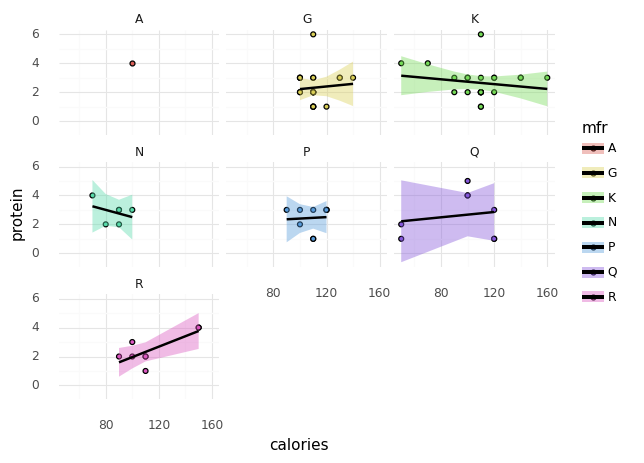

<ggplot: (139139907407)>

In [11]:
#3 Recreate the graph cereal.png (in the Assignmnets folder on GH) using the cereal data set

cereal = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/cereal.csv")

(ggplot(cereal, aes(x = "calories", y = "protein", fill = "mfr")) + 
 facet_wrap('mfr') + #https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_wrap.html
 geom_point() + 
 stat_smooth(method = "lm" ) +
 theme_minimal())